In [1]:
# 1.1 – Importar librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.2 – Cargar el archivo Excel
ts = pd.read_excel("exports/ts_final.xlsx")

# 1.3 – Vista rápida
print("Dimensiones:", ts.shape)
print("\nTipos de datos:")
print(ts.dtypes)

print("\nPrimeras 5 filas:")
display(ts.head())

print("\nResumen estadístico de variables numéricas:")
display(ts.describe().T)

print("\nValores nulos por columna:")
print(ts.isna().sum())


Dimensiones: (108, 10)

Tipos de datos:
ANO                            int64
MES                            int64
ventas_gasolina                int64
ventas_diesel                  int64
ventas_electrico               int64
ventas_otros                   int64
PIB_nominal                  float64
precio_gasolina_eur_litro    float64
ev_incentivos_mEur           float64
restriccion_score              int64
dtype: object

Primeras 5 filas:


,ANO,MES,ventas_gasolina,ventas_diesel,ventas_electrico,ventas_otros,PIB_nominal,precio_gasolina_eur_litro,ev_incentivos_mEur,restriccion_score
0,2015,1,22787,48250,55,0,1.206165e+12,1.130435,0.0,0
1,2015,2,31283,58821,51,0,1.206165e+12,1.187365,0.0,0
2,2015,3,42380,73040,162,0,1.206165e+12,1.258910,0.0,0
3,2015,4,31291,54507,111,0,1.206165e+12,1.285613,0.0,0
4,2015,5,36275,61082,118,0,1.206165e+12,1.314428,0.0,0



Resumen estadístico de variables numéricas:


,count,mean,std,min,25%,50%,75%,max
ANO,108.0,2.019000e+03,2.594026e+00,2.015000e+03,2.017000e+03,2.019000e+03,2.021000e+03,2.023000e+03
MES,108.0,6.500000e+00,3.468146e+00,1.000000e+00,3.750000e+00,6.500000e+00,9.250000e+00,1.200000e+01
ventas_gasolina,108.0,5.432270e+04,1.739670e+04,2.887000e+03,4.263900e+04,5.432050e+04,6.524000e+04,9.389900e+04
ventas_diesel,108.0,3.852796e+04,1.787649e+04,1.794000e+03,2.106225e+04,3.702850e+04,5.308000e+04,7.489000e+04
ventas_electrico,108.0,1.604972e+03,1.538109e+03,5.100000e+01,4.325000e+02,1.019500e+03,2.236250e+03,6.582000e+03
ventas_otros,108.0,1.888889e+00,4.280653e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.400000e+01
PIB_nominal,108.0,1.380410e+12,1.218543e+11,1.206165e+12,1.289784e+12,1.403496e+12,1.446498e+12,1.620091e+12
precio_gasolina_eur_litro,108.0,1.350977e+00,2.205756e-01,1.078875e+00,1.188771e+00,1.299499e+00,1.441777e+00,2.108957e+00
ev_incentivos_mEur,108.0,1.901000e+02,2.604726e+02,0.000000e+00,1.660000e+01,4.500000e+01,3.500000e+02,8.000000e+02
restriccion_score,108.0,4.444444e+00,3.036640e+00,0.000000e+00,2.000000e+00,4.000000e+00,7.000000e+00,9.000000e+00



Valores nulos por columna:
ANO                          0
MES                          0
ventas_gasolina              0
ventas_diesel                0
ventas_electrico             0
ventas_otros                 0
PIB_nominal                  0
precio_gasolina_eur_litro    0
ev_incentivos_mEur           0
restriccion_score            0
dtype: int64


In [5]:
# --- Creación del DatetimeIndex (Paso Crucial) ---
# Creamos una nueva columna 'fecha' combinando 'ANO' y 'MES'.
# El formato 'YYYY-MM' se completa con el día 1 por defecto.
ts['fecha'] = pd.to_datetime(ts['ANO'].astype(str) + '-' + ts['MES'].astype(str))

# Establecemos esta nueva columna 'fecha' como el índice del DataFrame.
ts.set_index('fecha', inplace=True)

In [9]:
# Eliminamos las columnas originales 'ANO' y 'MES' que ya no son necesarias.
ts.drop(['ANO', 'MES'], axis=1, inplace=True)

# --- Verificación ---
# Comprobamos que el índice se ha creado correctamente y visualizamos el resultado.
print("Información del DataFrame con el nuevo índice de fecha:")
print(ts.info())
print("\nÚltimas 5 filas del DataFrame para ver el final de la serie:")
print(ts.tail())

Información del DataFrame con el nuevo índice de fecha:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108 entries, 2015-01-01 to 2023-12-01
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ventas_gasolina            108 non-null    int64  
 1   ventas_diesel              108 non-null    int64  
 2   ventas_electrico           108 non-null    int64  
 3   ventas_otros               108 non-null    int64  
 4   PIB_nominal                108 non-null    float64
 5   precio_gasolina_eur_litro  108 non-null    float64
 6   ev_incentivos_mEur         108 non-null    float64
 7   restriccion_score          108 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 7.6 KB
None

Últimas 5 filas del DataFrame para ver el final de la serie:
            ventas_gasolina  ventas_diesel  ventas_electrico  ventas_otros  \
fecha                                                             

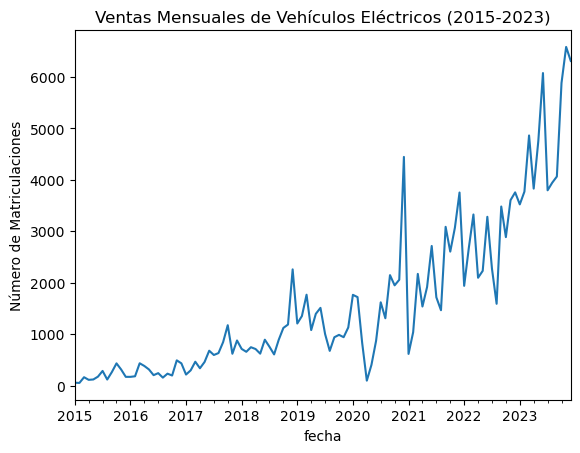

In [11]:
# Graficamos la variable objetivo para confirmar visualmente la correcta carga.
ts['ventas_electrico'].plot(title='Ventas Mensuales de Vehículos Eléctricos (2015-2023)')
plt.ylabel('Número de Matriculaciones')
plt.show()

# División de Datos (Train/Test Split)

In [14]:
# PASO 2: División de Datos (Train/Test Split)
X = ts.drop(['ventas_electrico', 'ventas_gasolina', 'ventas_diesel', 'ventas_otros'], axis=1)
y = ts['ventas_electrico']
fecha_corte = '2022-12-31'
X_train = X.loc[X.index <= fecha_corte]
X_test = X.loc[X.index > fecha_corte]
y_train = y.loc[y.index <= fecha_corte]
y_test = y.loc[y.index > fecha_corte]


In [16]:
# Imprimimos los tamaños para verificar que la división es correcta
print(f"Tamaño del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Tamaño del conjunto de prueba (X_test):      {X_test.shape}")

Tamaño del conjunto de entrenamiento (X_train): (96, 4)
Tamaño del conjunto de prueba (X_test):      (12, 4)


#  Análisis de Estacionariedad (ADF Test)

In [18]:
# --- PASO 3: Análisis de Estacionariedad (ADF Test) ---
from statsmodels.tsa.stattools import adfuller

# Se aplica el test sobre la variable objetivo del conjunto de entrenamiento
resultado_adf = adfuller(y_train)
p_valor = resultado_adf[1]

print(f"P-valor del test ADF sobre la serie original: {p_valor:.4f}")

P-valor del test ADF sobre la serie original: 0.9909


In [21]:
# Como el p-valor es alto, la serie no es estacionaria. La diferenciamos.
y_train_diff = y_train.diff().dropna() # .diff() calcula la diferencia, .dropna() elimina el primer valor que será NaN

In [23]:
# Volvemos a aplicar el test a la serie ya diferenciada
resultado_adf_diff = adfuller(y_train_diff)
p_valor_diff = resultado_adf_diff[1]

print(f"P-valor del test ADF sobre la serie diferenciada: {p_valor_diff:.4f}")
print("Conclusión: La serie diferenciada es estacionaria. Usaremos d=1.")

P-valor del test ADF sobre la serie diferenciada: 0.0000
Conclusión: La serie diferenciada es estacionaria. Usaremos d=1.


# Escalado de Variables

In [26]:
# --- PASO 4: Escalado de Variables ---
from sklearn.preprocessing import StandardScaler

# 1. Crear una instancia del escalador
scaler = StandardScaler()

# 2. Ajustar el escalador y transformar el conjunto de entrenamiento en un solo paso
#    El escalador "aprende" la media y la desviación estándar de X_train
X_train_scaled = scaler.fit_transform(X_train)


In [28]:
# 3. Usar el escalador ya ajustado para transformar el conjunto de prueba
#    NO se vuelve a ajustar (no se usa fit), solo se transforma.
X_test_scaled = scaler.transform(X_test)

# (Opcional pero recomendado) Convertir los arrays de numpy de vuelta a DataFrames de pandas
# para mantener la legibilidad con los nombres de las columnas y las fechas.
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

print("Variables escaladas. Primeras filas de X_train_scaled:")
print(X_train_scaled.head())

Variables escaladas. Primeras filas de X_train_scaled:
            PIB_nominal  precio_gasolina_eur_litro  ev_incentivos_mEur  \
fecha                                                                    
2015-01-01    -1.567634                  -0.897366           -0.633864   
2015-02-01    -1.567634                  -0.620990           -0.633864   
2015-03-01    -1.567634                  -0.273663           -0.633864   
2015-04-01    -1.567634                  -0.144027           -0.633864   
2015-05-01    -1.567634                  -0.004144           -0.633864   

            restriccion_score  
fecha                          
2015-01-01          -1.428405  
2015-02-01          -1.428405  
2015-03-01          -1.428405  
2015-04-01          -1.428405  
2015-05-01          -1.428405  


<Figure size 1000x400 with 0 Axes>

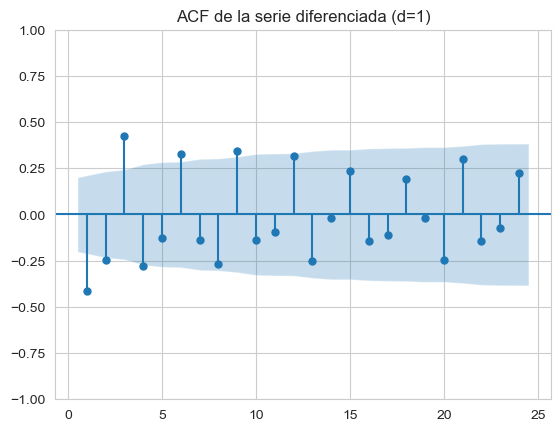

<Figure size 1000x400 with 0 Axes>

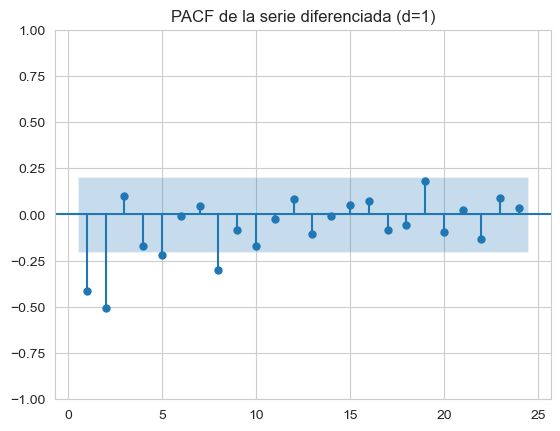

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Recortamos la serie diferenciada y los regresores para que coincidan
y_train_diff = y_train.diff().dropna()
X_train_diff = X_train.loc[y_train_diff.index]

# 1.1 – ACF
plt.figure(figsize=(10,4))
plot_acf(y_train_diff, lags=24, zero=False)
plt.title("ACF de la serie diferenciada (d=1)")
plt.show()

# 1.2 – PACF
plt.figure(figsize=(10,4))
plot_pacf(y_train_diff, lags=24, zero=False, method='ywm')
plt.title("PACF de la serie diferenciada (d=1)")
plt.show()


In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 2.1 – Definir órdenes
p, d, q = 1, 1, 1  # ajusta tras ver ACF/PACF

# 2.2 – Crear y entrenar el modelo con exógenas
model = SARIMAX(
    endog=y_train,
    exog=X_train_scaled,
    order=(p, d, q),
    enforce_stationarity=False,
    enforce_invertibility=False
)
res = model.fit(disp=False)

# 2.3 – Resumen de resultados
print(res.summary())


                               SARIMAX Results                                
Dep. Variable:       ventas_electrico   No. Observations:                   96
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -718.476
Date:                Tue, 08 Jul 2025   AIC                           1450.953
Time:                        04:10:30   BIC                           1468.681
Sample:                    01-01-2015   HQIC                          1458.111
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
PIB_nominal                -628.4710    605.430     -1.038      0.299   -1815.093     558.151
precio_gasolina_eur_litro   491.5231    171.107      2.873      0.004     156.159     

C:\Users\pablo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\pablo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [48]:
# Creamos lags de 1, 3, 6 y 12 meses para cada variable exógena
lags = [1, 3, 6, 12]
exogs = ['ev_incentivos_mEur', 'restriccion_score', 'PIB_nominal', 'precio_gasolina_eur_litro']

for col in exogs:
    for lag in lags:
        ts[f"{col}_lag{lag}"] = ts[col].shift(lag)

# Eliminamos las filas con NaN resultantes de los lags
ts_lagged = ts.dropna().copy()


In [50]:
# Índices: up to 2021 → train; 2022 → val; 2023 → test
train = ts_lagged[:'2021-12-31']
val   = ts_lagged['2022-01-01':'2022-12-31']
test  = ts_lagged['2023-01-01':       ]

# Separar X / y
y_train = train['ventas_electrico']
X_train = train.drop('ventas_electrico', axis=1)

y_val   = val['ventas_electrico']
X_val   = val.drop('ventas_electrico', axis=1)

y_test  = test['ventas_electrico']
X_test  = test.drop('ventas_electrico', axis=1)


In [60]:
import xgboost as xgb

# Convertimos nuestros conjuntos a DMatrix, el formato interno óptimo de XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dval   = xgb.DMatrix(X_val,   label=y_val)
dtest  = xgb.DMatrix(X_test,  label=y_test)


In [62]:
params = {
    "objective": "reg:squarederror",
    "eta": 0.05,            # learning_rate
    "max_depth": 4,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "eval_metric": "rmse",  # aquí sí lo acepta
    "seed": 42
}

evals = [(dtrain, "train"), (dval, "validation")]


In [64]:
# num_boost_round = 1000, early_stopping_rounds = 50
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=50,
    verbose_eval=50  # imprime cada 50 iteraciones
)


[0]	train-rmse:838.99979	validation-rmse:1719.34972
[50]	train-rmse:213.51571	validation-rmse:651.62534
[100]	train-rmse:83.69402	validation-rmse:602.83110
[150]	train-rmse:39.95538	validation-rmse:604.38218
[157]	train-rmse:36.83484	validation-rmse:604.54314


In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# 1) Iteración óptima
best_iter = bst.best_iteration

# 2) Pronóstico para validación y test usando iteration_range
y_val_pred  = bst.predict(dval,  iteration_range=(0, best_iter))
y_test_pred = bst.predict(dtest, iteration_range=(0, best_iter))

# 3) Cálculo de métricas
rmse_val  = mean_squared_error(y_val,  y_val_pred,  squared=False)
mape_val  = mean_absolute_percentage_error(y_val,  y_val_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

print(f"VALIDACIÓN → RMSE: {rmse_val:.1f}, MAPE: {mape_val*100:.1f}%")
print(f"PRUEBA     → RMSE: {rmse_test:.1f}, MAPE: {mape_test*100:.1f}%")


VALIDACIÓN → RMSE: 601.3, MAPE: 19.8%
PRUEBA     → RMSE: 2205.2, MAPE: 37.9%


C:\Users\pablo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\pablo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# CONSTRUCCIÓN DE MODELOS

## MODELO 1: ARIMAX

In [36]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
# --- 2. Construcción y Entrenamiento del Modelo ARIMAX ---
# Nota: Para los modelos ARIMA, usamos los datos SIN escalar
print("Entrenando el modelo ARIMAX(1,1,1)...")
model_arimax = ARIMA(endog=y_train, exog=X_train, order=(1, 1, 1))
results_arimax = model_arimax.fit()
print("¡Modelo entrenado!")

Entrenando el modelo ARIMAX(1,1,1)...
¡Modelo entrenado!


C:\Users\pablo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\pablo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\pablo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\pablo\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [38]:
# --- 3. Generación de Predicciones ---
print("\nGenerando predicciones para el año 2023...")
predicciones_arimax = results_arimax.forecast(steps=len(y_test), exog=X_test)
print("¡Predicciones generadas!")


Generando predicciones para el año 2023...
¡Predicciones generadas!


In [40]:
# --- 4. Evaluación Cuantitativa ---
# Se calcula la raíz cuadrada del error cuadrático medio.
rmse_arimax = np.sqrt(mean_squared_error(y_test, predicciones_arimax))
mape_arimax = mean_absolute_percentage_error(y_test, predicciones_arimax)

print("\n--- Evaluación Cuantitativa del Modelo ARIMAX ---")
print(f"RMSE (Error Cuadrático Medio de la Raíz): {rmse_arimax:.2f}")
print(f"MAPE (Error Porcentual Absoluto Medio): {mape_arimax:.2%}")



--- Evaluación Cuantitativa del Modelo ARIMAX ---
RMSE (Error Cuadrático Medio de la Raíz): 1369.35
MAPE (Error Porcentual Absoluto Medio): 29.53%


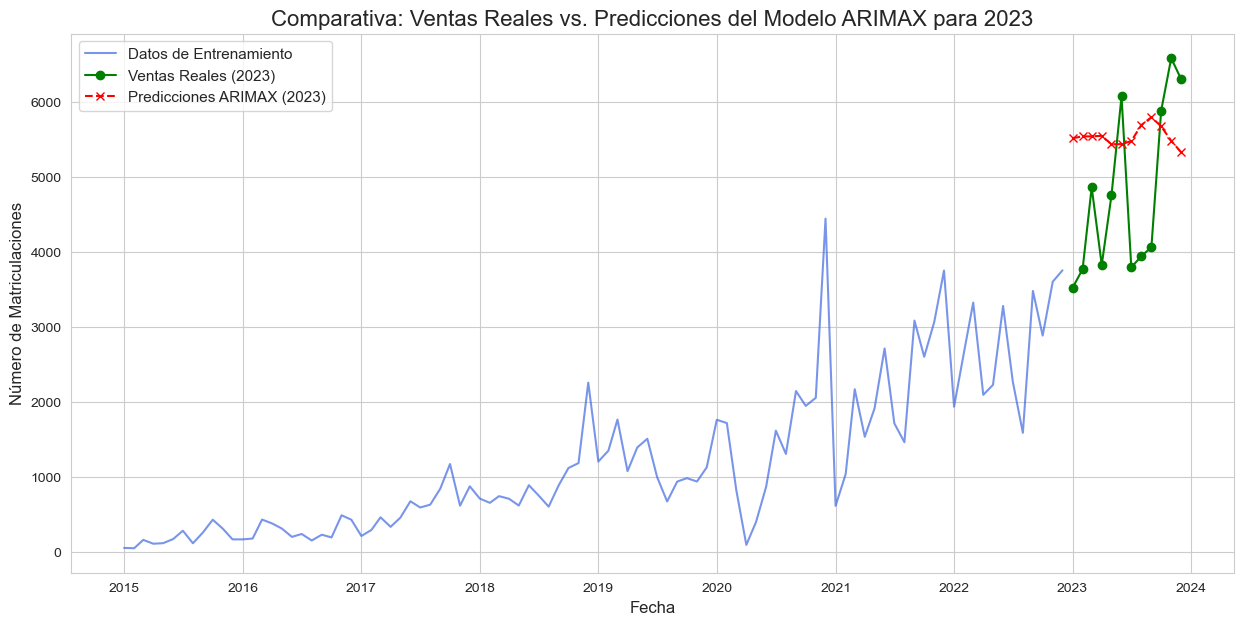

In [42]:
# --- 5. Visualización de Resultados ---
sns.set_style("whitegrid")
plt.figure(figsize=(15, 7))

plt.plot(y_train.index, y_train, label='Datos de Entrenamiento', color='royalblue', alpha=0.7)
plt.plot(y_test.index, y_test, label='Ventas Reales (2023)', color='green', marker='o', linestyle='-')
plt.plot(y_test.index, predicciones_arimax, label='Predicciones ARIMAX (2023)', color='red', marker='x', linestyle='--')

plt.title('Comparativa: Ventas Reales vs. Predicciones del Modelo ARIMAX para 2023', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Número de Matriculaciones', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True)
plt.show()


In [72]:
# --- 1.1  Crear lags (1, 3, 6 meses) ---
lags = [1, 3, 6]

cols_to_lag = [
    'ventas_electrico',
    'ev_incentivos_mEur',
    'restriccion_score',
    'PIB_nominal',
    'precio_gasolina_eur_litro'
]

for col in cols_to_lag:
    for k in lags:
        ts[f"{col}_lag{k}"] = ts[col].shift(k)

# --- 1.2  Eliminar filas con NaN (por los lags) ---
ts_ml = ts.dropna().copy()


In [74]:
# 2.1 Separamos target y features
y = ts_ml['ventas_electrico']
X = ts_ml.drop([
    'ventas_electrico',
    'ventas_gasolina',
    'ventas_diesel',
    'ventas_otros'   # si la mantienes
], axis=1)

# 2.2 Partición: train (2015-2021), val (2022), test (2023)
idx_train = X.index < '2022-01-01'
idx_val   = (X.index >= '2022-01-01') & (X.index < '2023-01-01')
idx_test  = X.index >= '2023-01-01'

X_train, y_train = X.loc[idx_train], y.loc[idx_train]
X_val,   y_val   = X.loc[idx_val],   y.loc[idx_val]
X_test,  y_test  = X.loc[idx_test],  y.loc[idx_test]


In [76]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# 3.1  Espacio pequeño de hiperparámetros
param_grid = {
    'n_estimators': [400, 800],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

best_rmse = np.inf
best_model = None
best_params = None

for n in param_grid['n_estimators']:
    for md in param_grid['max_depth']:
        for lr in param_grid['learning_rate']:
            for ss in param_grid['subsample']:
                for cs in param_grid['colsample_bytree']:
                    
                    model = XGBRegressor(
                        n_estimators=n,
                        max_depth=md,
                        learning_rate=lr,
                        subsample=ss,
                        colsample_bytree=cs,
                        objective='reg:squarederror',
                        random_state=42
                    )
                    
                    model.fit(
                        X_train, y_train,
                        eval_set=[(X_val, y_val)],
                        eval_metric='rmse',
                        verbose=False,
                        early_stopping_rounds=50
                    )
                    
                    y_val_pred = model.predict(X_val)
                    rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)
                    
                    if rmse_val < best_rmse:
                        best_rmse = rmse_val
                        best_model = model
                        best_params = {
                            'n_estimators': n,
                            'max_depth': md,
                            'learning_rate': lr,
                            'subsample': ss,
                            'colsample_bytree': cs
                        }

print("Mejores hiperparámetros:", best_params)
print(f"RMSE en validación: {best_rmse:.1f}")


TypeError: XGBModel.fit() got an unexpected keyword argument 'eval_metric'

In [82]:
X = ts.drop(['ventas_electrico'], axis=1)
y = ts['ventas_electrico']

# --- División de Datos para Series Temporales ---
X_train = X[X.index.year < 2023]
y_train = y[y.index.year < 2023]
X_test = X[X.index.year == 2023]
y_test = y[y.index.year == 2023]


In [88]:
import pandas as pd
import numpy as np
import xgboost as xgb  # Si este import falla, asegúrate de haber instalado la librería
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import io

# --- Búsqueda de Hiperparámetros ---
print("Buscando los mejores hiperparámetros...")
tscv = TimeSeriesSplit(n_splits=5)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
}
grid_search = GridSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1
)
grid_search.fit(X_train, y_train)
print(f"Mejores hiperparámetros encontrados: {grid_search.best_params_}")


Buscando los mejores hiperparámetros...
Mejores hiperparámetros encontrados: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300}


In [90]:
# --- Entrenamiento y Evaluación del Modelo Final ---
print("\nEntrenando y evaluando el modelo final...")
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
results = pd.DataFrame({'real': y_test, 'prediccion': predictions}, index=y_test.index)

mae = mean_absolute_error(results['real'], results['prediccion'])
print(f"\nError Absoluto Medio (MAE): {mae:.2f}")
print(f"Esto significa que, en promedio, las predicciones de ventas para 2023 se desviaron en unas {mae:.0f} unidades.")



Entrenando y evaluando el modelo final...

Error Absoluto Medio (MAE): 1382.56
Esto significa que, en promedio, las predicciones de ventas para 2023 se desviaron en unas 1383 unidades.



Generando gráfico de resultados...
Gráfico guardado como 'prediccion_ventas_electricos.png'


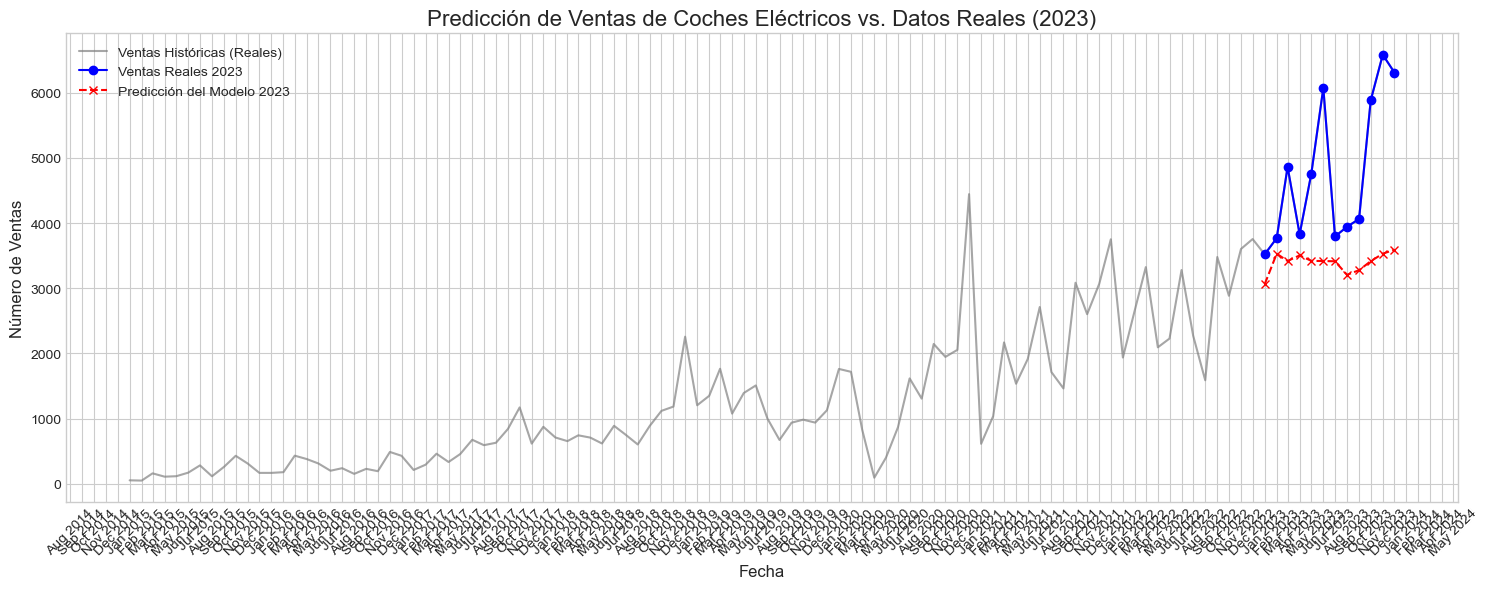

In [92]:
# --- Visualización de Resultados ---
print("\nGenerando gráfico de resultados...")
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(y, label='Ventas Históricas (Reales)', color='gray', alpha=0.7)
ax.plot(results['real'], label='Ventas Reales 2023', color='blue', marker='o')
ax.plot(results['prediccion'], label='Predicción del Modelo 2023', color='red', linestyle='--', marker='x')
ax.set_title('Predicción de Ventas de Coches Eléctricos vs. Datos Reales (2023)', fontsize=16)
ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylabel('Número de Ventas', fontsize=12)
ax.legend()

from matplotlib.dates import MonthLocator, DateFormatter
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('prediccion_ventas_electricos.png')
print("Gráfico guardado como 'prediccion_ventas_electricos.png'")
plt.show()


In [98]:
X = ts.drop(['ventas_electrico'], axis=1)
y = ts['ventas_electrico']

# --- División de Datos para Series Temporales ---
X_train = X[X.index.year < 2023]
y_train = y[y.index.year < 2023]
X_test = X[X.index.year == 2023]
y_test = y[y.index.year == 2023]


In [100]:

# ------------------------------------------------------------------------------------
# --- 2. MEJORA: AMPLIAR BÚSQUEDA DE HIPERPARÁMETROS ---
# ------------------------------------------------------------------------------------
print("\nBuscando los mejores hiperparámetros con un grid ampliado...")
tscv = TimeSeriesSplit(n_splits=5)

# Añadimos más parámetros para regular el modelo y evitar sobreajuste
param_grid = {
    'n_estimators': [200, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.7, 0.8], # Proporción de muestras de entrenamiento
    'colsample_bytree': [0.7, 0.8] # Proporción de features
}

grid_search = GridSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1
)
grid_search.fit(X_train, y_train)
print(f"Mejores hiperparámetros encontrados: {grid_search.best_params_}")




Buscando los mejores hiperparámetros con un grid ampliado...
Mejores hiperparámetros encontrados: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}


In [102]:

# --- Entrenamiento y Evaluación del Modelo FINAL ---
print("\nEntrenando y evaluando el modelo final mejorado...")
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
results = pd.DataFrame({'real': y_test, 'prediccion': predictions}, index=y_test.index)

mae = mean_absolute_error(results['real'], results['prediccion'])
print(f"\nError Absoluto Medio (MAE) del modelo mejorado: {mae:.2f}")



Entrenando y evaluando el modelo final mejorado...

Error Absoluto Medio (MAE) del modelo mejorado: 1596.50



Generando gráfico de resultados...


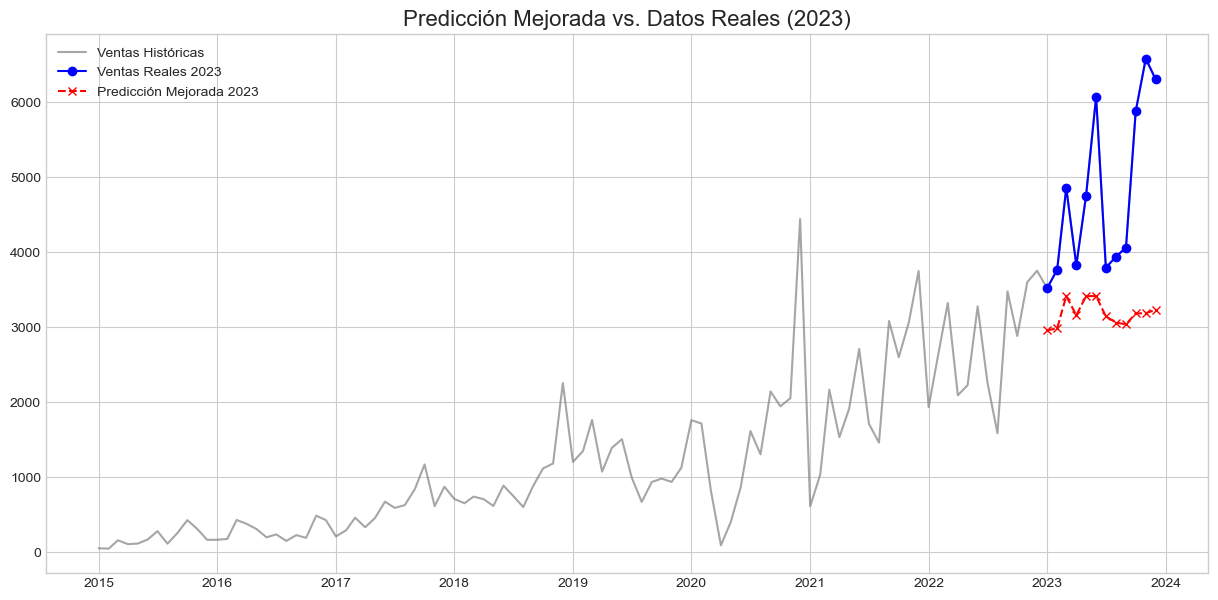

In [106]:
# --- Visualización de Resultados ---
print("\nGenerando gráfico de resultados...")
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(ts[target], label='Ventas Históricas', color='gray', alpha=0.7)
ax.plot(results['real'], label='Ventas Reales 2023', color='blue', marker='o', linestyle='-')
ax.plot(results['prediccion'], label='Predicción Mejorada 2023', color='red', marker='x', linestyle='--')
ax.set_title('Predicción Mejorada vs. Datos Reales (2023)', fontsize=16)
ax.legend()
plt.show()

In [108]:
# --------------------------------------------------
# 2. Ingeniería de lags
# --------------------------------------------------
def create_lags(df, lag_list):
    out = df.copy()
    for lag in lag_list:
        # lag del objetivo
        out[f'ventas_lag{lag}'] = df['ventas_electrico'].shift(lag)
        # lags de los regresores más importantes
        for col in ['ev_incentivos_mEur',
                    'restriccion_score',
                    'precio_gasolina_eur_litro',
                    'PIB_nominal']:
            out[f'{col}_lag{lag}'] = df[col].shift(lag)
    return out


In [110]:
# aplicamos y eliminamos las filas con NaN
ts_lagged = create_lags(ts, lag_list=[1, 3, 6, 12]).dropna()


In [112]:
# --------------------------------------------------
# 3. Variable objetivo log-transformada
# --------------------------------------------------
ts_lagged['log_ventas'] = np.log1p(ts_lagged['ventas_electrico'])

# X = todos los regresores excepto la variable objetivo en ambas escalas
X = ts_lagged.drop(columns=['ventas_electrico', 'log_ventas'])
y = ts_lagged['log_ventas']          # <- modelamos en log


In [114]:

# --------------------------------------------------
# 4. División temporal
# --------------------------------------------------
#   train: 2015-2020
#   val:   2021-2022
#   test:  2023
idx_train = X.index.year <= 2020
idx_val   = X.index.year.isin([2021, 2022])
idx_test  = X.index.year == 2023

X_train, y_train = X[idx_train], y[idx_train]
X_val,   y_val   = X[idx_val],   y[idx_val]
X_test,  y_test  = X[idx_test],  ts_lagged.loc[idx_test, 'ventas_electrico']  # ← guardamos en escala original


In [183]:

# --------------------------------------------------
# 5. Entrenamiento XGBoost con early-stopping
# --------------------------------------------------
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=2000,
    learning_rate=0.03,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='rmse',
    early_stopping_rounds=200


)

model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=False
)

print(f"Mejores iteraciones: {model.best_iteration}")


Mejores iteraciones: 229


In [185]:
# --------------------------------------------------
# 6. Predicción y evaluación en 2023
# --------------------------------------------------
y_pred_log = model.predict(X_test)
y_pred     = np.expm1(y_pred_log)      # des-logaritmamos

rmse  = mean_squared_error(y_test, y_pred, squared=False)
mape  = mean_absolute_percentage_error(y_test, y_pred)

print(f"RMSE 2023: {rmse:.0f}")
print(f"MAPE 2023: {mape*100:.1f}%")

C:\Users\pablo\AppData\Local\Temp\ipykernel_109200\2471558524.py:5: RuntimeWarning: overflow encountered in expm1
  y_pred     = np.expm1(y_pred_log)      # des-logaritmamos
C:\Users\pablo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ValueError: Input contains infinity or a value too large for dtype('float32').

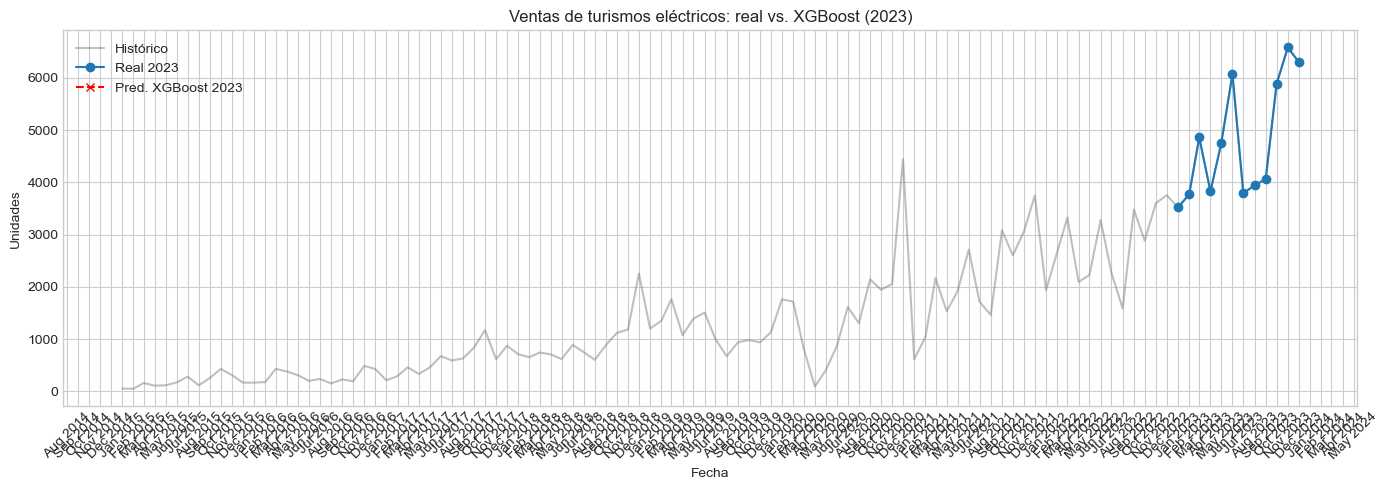

In [187]:
# --------------------------------------------------
# 7. Visualización
# --------------------------------------------------
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(ts.index, ts['ventas_electrico'], color='gray', alpha=0.5, label='Histórico')
ax.plot(y_test.index, y_test, marker='o', label='Real 2023')
ax.plot(y_test.index, y_pred, marker='x', linestyle='--', color='red', label='Pred. XGBoost 2023')
ax.set_title('Ventas de turismos eléctricos: real vs. XGBoost (2023)')
ax.set_xlabel('Fecha'); ax.set_ylabel('Unidades')
ax.legend()

ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [145]:
print("X_test rows :", X_test.shape[0])
print("y_test rows :", y_test.shape[0])
print("First dates:", X_test.index.min(), y_test.index.min())
print("Last  dates:", X_test.index.max(), y_test.index.max())


X_test rows : 12
y_test rows : 12
First dates: 2023-01-01 00:00:00 2023-01-01 00:00:00
Last  dates: 2023-12-01 00:00:00 2023-12-01 00:00:00


In [147]:
common = X_test.index.intersection(y_test.index)
X_test  = X_test.loc[common]
y_test  = y_test.loc[common]


In [149]:
print("X_test rows :", X_test.shape[0])
print("y_test rows :", y_test.shape[0])
print("First dates:", X_test.index.min(), y_test.index.min())
print("Last  dates:", X_test.index.max(), y_test.index.max())


X_test rows : 12
y_test rows : 12
First dates: 2023-01-01 00:00:00 2023-01-01 00:00:00
Last  dates: 2023-12-01 00:00:00 2023-12-01 00:00:00


In [151]:
y = ts_lagged['ventas_electrico']
# ... mismo pipeline sin log1p / expm1 ...


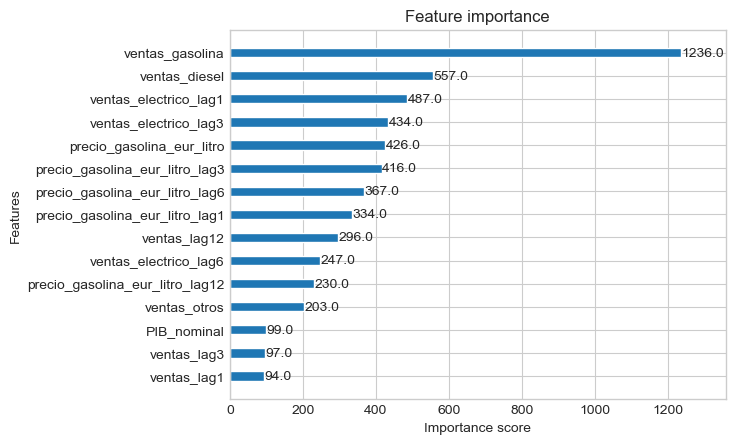

In [153]:
xgb.plot_importance(model, max_num_features=15, height=0.4)
plt.show()


In [155]:
# --------------------------------------------------
# 1. Ingeniería de lags
# --------------------------------------------------
def add_lags(df, lags=(1, 3)):
    out = df.copy()
    # lags del objetivo
    for lag in lags:
        out[f'ventas_lag{lag}'] = df['ventas_electrico'].shift(lag)
    # lags de regresores exógenos
    exos = ['ev_incentivos_mEur',
            'restriccion_score',
            'precio_gasolina_eur_litro',
            'PIB_nominal']
    for col in exos:
        for lag in lags:
            out[f'{col}_lag{lag}'] = df[col].shift(lag)
    return out

ts_lagged = add_lags(ts, lags=(1, 3)).dropna()


In [157]:
# --------------------------------------------------
# 2. Definimos X e y
# --------------------------------------------------
y = ts_lagged['ventas_electrico']
X = ts_lagged.drop(columns=['ventas_electrico'])


In [191]:
# --------------------------------------------------
# 3. Split temporal: train (2015-20), val (2021-22), test (2023)
# --------------------------------------------------
idx_train = X.index.year <= 2020
idx_val   = X.index.year.isin([2021, 2022])
idx_test  = X.index.year == 2023

X_train, y_train = X[idx_train], y[idx_train]
X_val,   y_val   = X[idx_val],   y[idx_val]
X_test,  y_test  = X[idx_test],  y[idx_test]

# Seguridad: aseguramos misma longitud en test
common = X_test.index.intersection(y_test.index)
X_test = X_test.loc[common]
y_test = y_test.loc[common]

print("Dimensiones ->",
      "Train:", X_train.shape,
      "Val:", X_val.shape,
      "Test:", X_test.shape)

# ------------------------------------

Dimensiones -> Train: (60, 28) Val: (24, 28) Test: (12, 28)


In [195]:
# --------------------------------------------------
# 4. Modelo XGBoost con early stopping
# --------------------------------------------------
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1500,        # alto para que temprano-pare
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='rmse',
    early_stopping_rounds=100

)

model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=False
)

print(f"Iteraciones realmente usadas: {model.best_iteration}")


Iteraciones realmente usadas: 111


In [197]:

# --------------------------------------------------
# 5. Predicción y métricas en 2023
# --------------------------------------------------
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"\n>>  RMSE 2023: {rmse:.0f}")
print(f">>  MAPE 2023: {mape*100:.1f}%")



>>  RMSE 2023: 2361
>>  MAPE 2023: 39.4%


C:\Users\pablo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


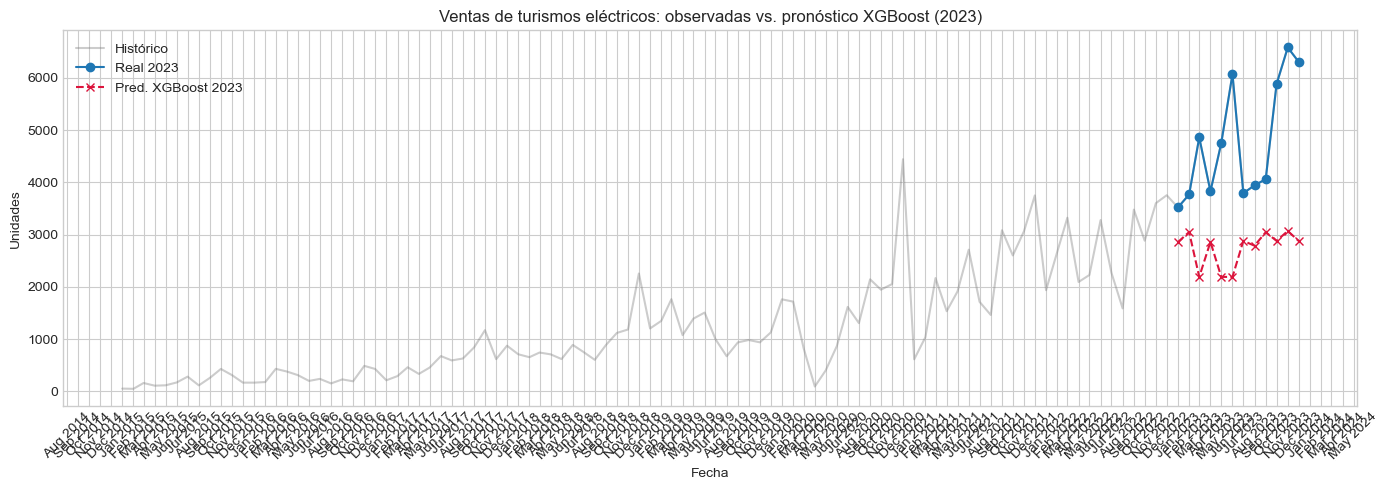

In [199]:
# --------------------------------------------------
# 6. Gráfico Real vs Pred
# --------------------------------------------------
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(ts.index, ts['ventas_electrico'], color='gray', alpha=0.4, label='Histórico')
ax.plot(y_test.index, y_test,  marker='o', label='Real 2023')
ax.plot(y_test.index, y_pred, marker='x', linestyle='--', color='crimson',
        label='Pred. XGBoost 2023')
ax.set_title('Ventas de turismos eléctricos: observadas vs. pronóstico XGBoost (2023)')
ax.set_xlabel('Fecha'); ax.set_ylabel('Unidades')
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))
ax.legend(); plt.xticks(rotation=45); plt.tight_layout()
plt.show()


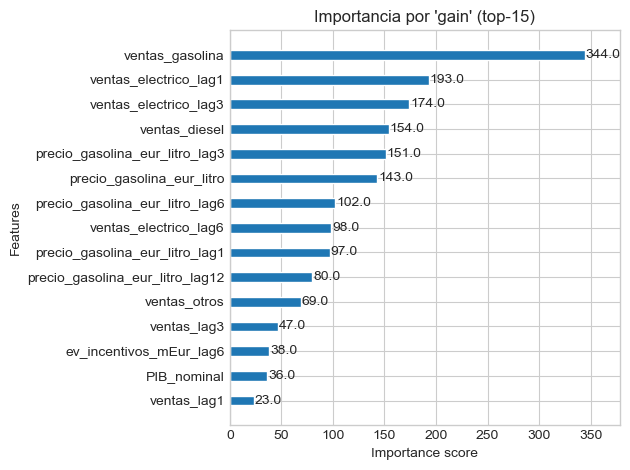

In [167]:
# --------------------------------------------------
# 7. Importancia de variables (opcional)
# --------------------------------------------------
xgb.plot_importance(model, max_num_features=15, height=0.4)
plt.title("Importancia por 'gain' (top-15)")
plt.tight_layout(); plt.show()